<a href="https://colab.research.google.com/github/hyunBBB/OMG/blob/main/11_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os
import time

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


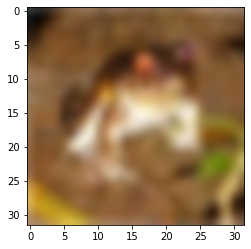

In [4]:
plt.imshow(x_train[0], interpolation="bicubic")
# 이미지 사이즈가 너무 작아서 블러쳐리 된 것임
# 시파텐은 성능 올라가는 데 한계가 있음.

In [5]:
y_train.shape

(50000, 1)

In [6]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
y_train.shape

(50000, 10)

In [8]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [9]:
train_images.shape

(49500, 32, 32, 3)

In [10]:
model = keras.models.Sequential([
   keras.layers.Conv2D(filters = 96, kernel_size= (3,3), strides = (1,1), activation = 'relu', input_shape=train_images[0].shape ) ,
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

   keras.layers.Conv2D(filters = 256, kernel_size= (5,5), strides = (1,1), activation = 'relu', padding='same' ) ,
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

   keras.layers.Conv2D(filters = 384, kernel_size= (3,3), strides = (1,1), activation = 'relu' , padding='same') ,
   keras.layers.BatchNormalization(),

   keras.layers.Conv2D(filters = 384, kernel_size= (1,1), strides = (1,1), activation = 'relu', padding='same') ,
   keras.layers.BatchNormalization(),

   keras.layers.Conv2D(filters = 256, kernel_size= (1,1), strides = (1,1), activation = 'relu', padding='same' ) ,
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

   keras.layers.Flatten(),

   keras.layers.Dense(4096, activation = 'relu'),

   keras.layers.Dense(4096, activation = 'relu'),

   keras.layers.Dense(10, activation = 'softmax')


])

In [11]:

# loss : categorical crossentropy , optimizer : adam, metrics: accruacy
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 256)      1024      
 hNormalization)                                                 
                                                        

In [12]:
# ImageDataGenerator Class: Image Data Augmentaion을 위한 다양한 설정정보 지정

# rotation_range : 랜덤하게 사진을 회전시킬 각도 범위
# width_shift_range/ height_shift_range: 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위
# shear_range : 랜덤하게 전단 변환을 적용할 각도 범위
# zoom_range: 랜덤하게 사진을 확대할 범위
# horizontal_flip: 랜덤하게 이미지를 수평으로 뒤집음
# fill_mode: 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

In [13]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [15]:
history = model.fit(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

Epoch 1/10
1547/1547 [==============================] - 35s 22ms/step - loss: 1.3031 - accuracy: 0.5352 - val_loss: 1.5922 - val_accuracy: 0.4460
Epoch 2/10
1547/1547 [==============================] - 34s 22ms/step - loss: 1.0252 - accuracy: 0.6412 - val_loss: 1.0464 - val_accuracy: 0.6420
Epoch 3/10
1547/1547 [==============================] - 33s 21ms/step - loss: 0.8728 - accuracy: 0.6996 - val_loss: 1.2602 - val_accuracy: 0.6060
Epoch 4/10
1547/1547 [==============================] - 34s 22ms/step - loss: 0.7745 - accuracy: 0.7340 - val_loss: 0.8119 - val_accuracy: 0.7120
Epoch 5/10
1547/1547 [==============================] - 33s 22ms/step - loss: 0.7135 - accuracy: 0.7533 - val_loss: 0.8077 - val_accuracy: 0.7180
Epoch 6/10
1547/1547 [==============================] - 33s 21ms/step - loss: 0.6544 - accuracy: 0.7776 - val_loss: 0.8880 - val_accuracy: 0.7180
Epoch 7/10
1547/1547 [==============================] - 33s 22ms/step - loss: 0.6061 - accuracy: 0.7932 - val_loss: 0.8179 -

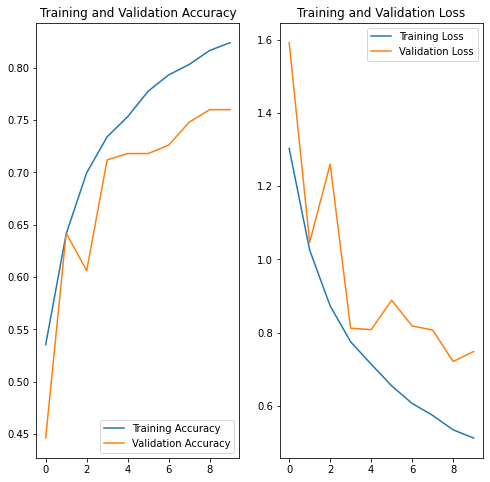

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()